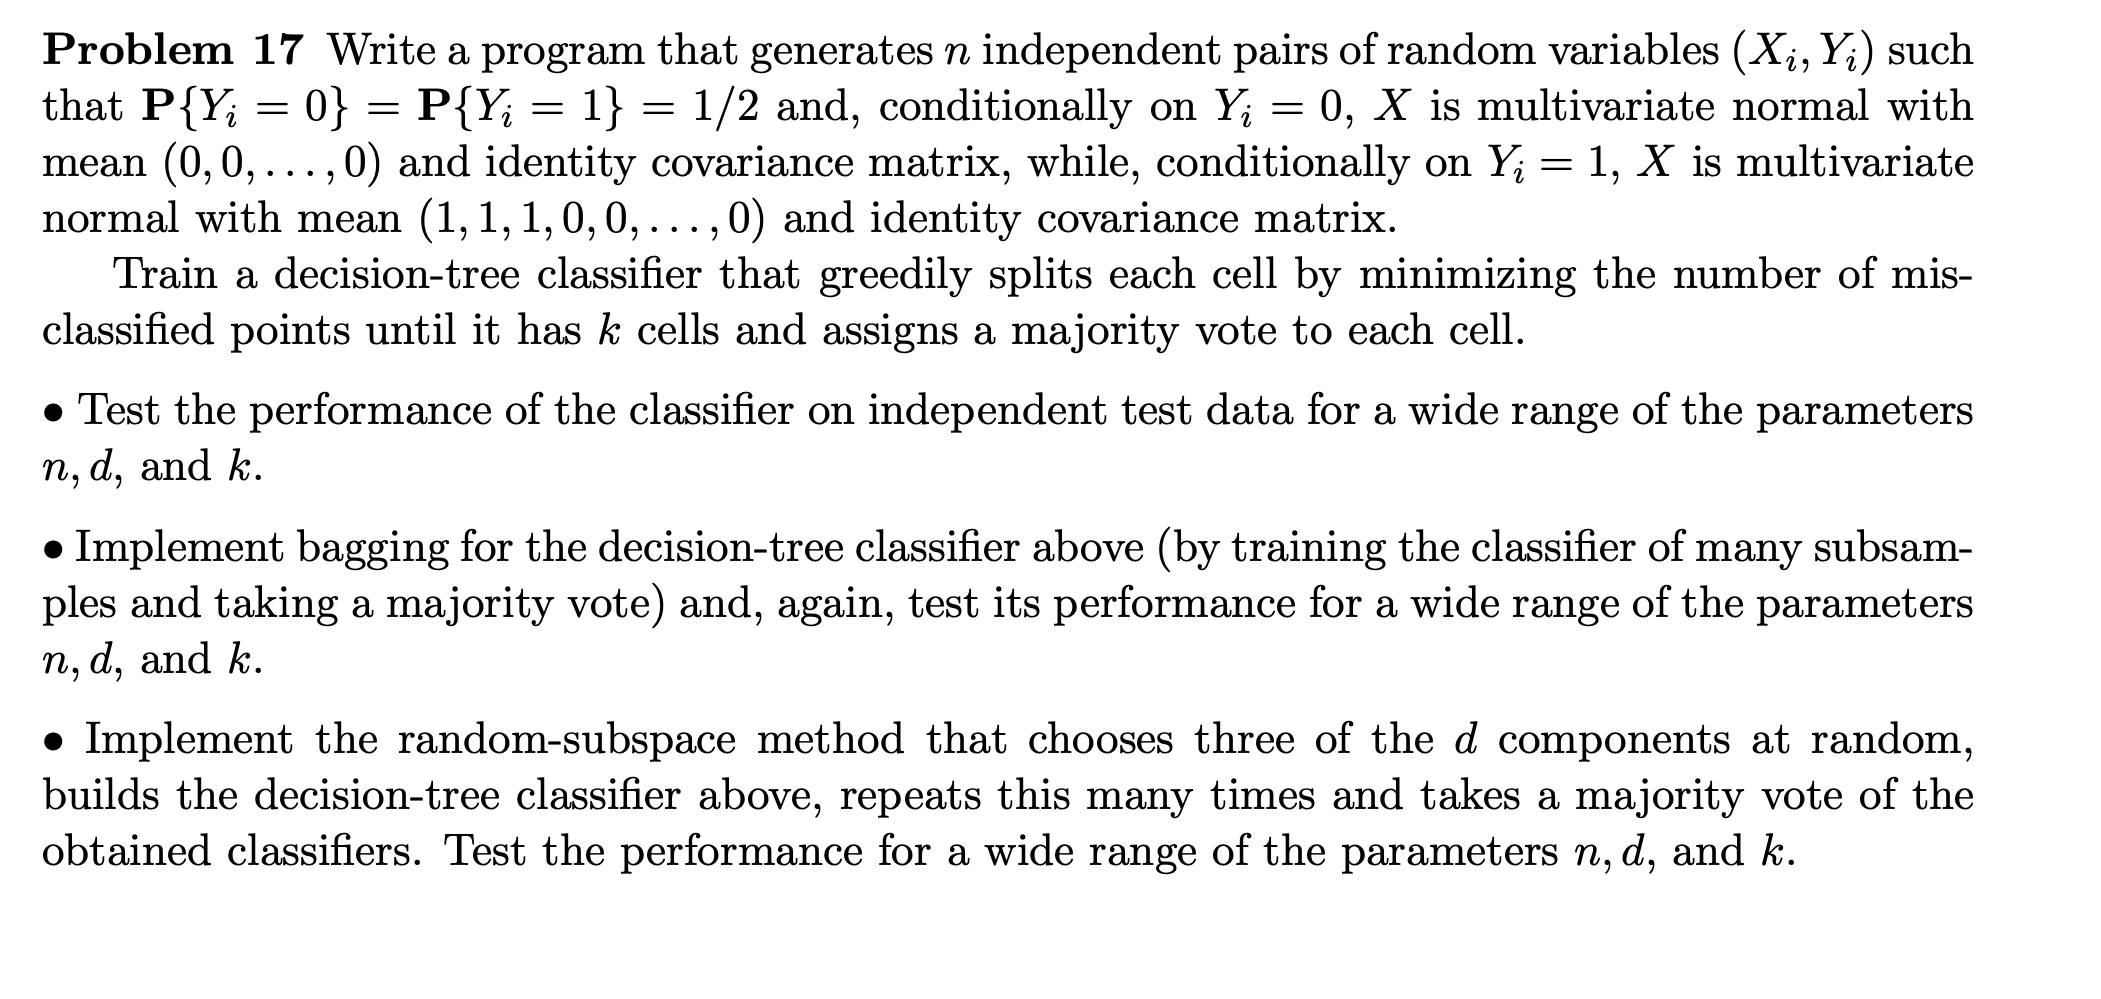

In [1]:
from IPython.display import Image
Image(filename='prob17.png')

# Comments

- We observe lower variance for the bagging estimator and higher overall accuracy out of sample compared to the Decision Tree. This is due to the fact that bagging compensates for the effects of overfitting by averaging the results from multiple decision trees created from different samples of the data. 
- Random subspace works well in 3D- this is to be expected given that all dimensions contain meaningful separations in the data- but less well in higher D, when non-relevant dimensions could also be selected at random to partition the data into classes.
- For low numbers of nodes (2), in general it seems that lower levels of accuracy can be achieved. As the number of nodes increases, the accuracy levels increase- but only to a level. For our dataset, there does not appear to be an observable difference between 5 nodes and 50- which would make sense intuitively as the data-generating process would only benefit from linear separators in 3 dimensions.  
    - Note that these results are out of sample. Within sample, we would expect increasing nodes to equal increasing accuracy (but won't result in higher accuracy out of sample due to overfitting.
- Increasing the number of dimensions here means increasing the number of dimensions for which no relevant information can be ascertained in distinguishing between the classes. Therefore we would expect (and do see) that increasing the number of dimensions reduces the accuracy and increases the noise.
     - However we don't see increased noise in the random subspace selection method as only 3 dimensions are picked at any one time anyway.
     - We also see that bagging appears to outperform the normal decision tree estimator in every dimension.

# Out of sample accuracy for different estimators for a variety of methods, ns and cluster sizes

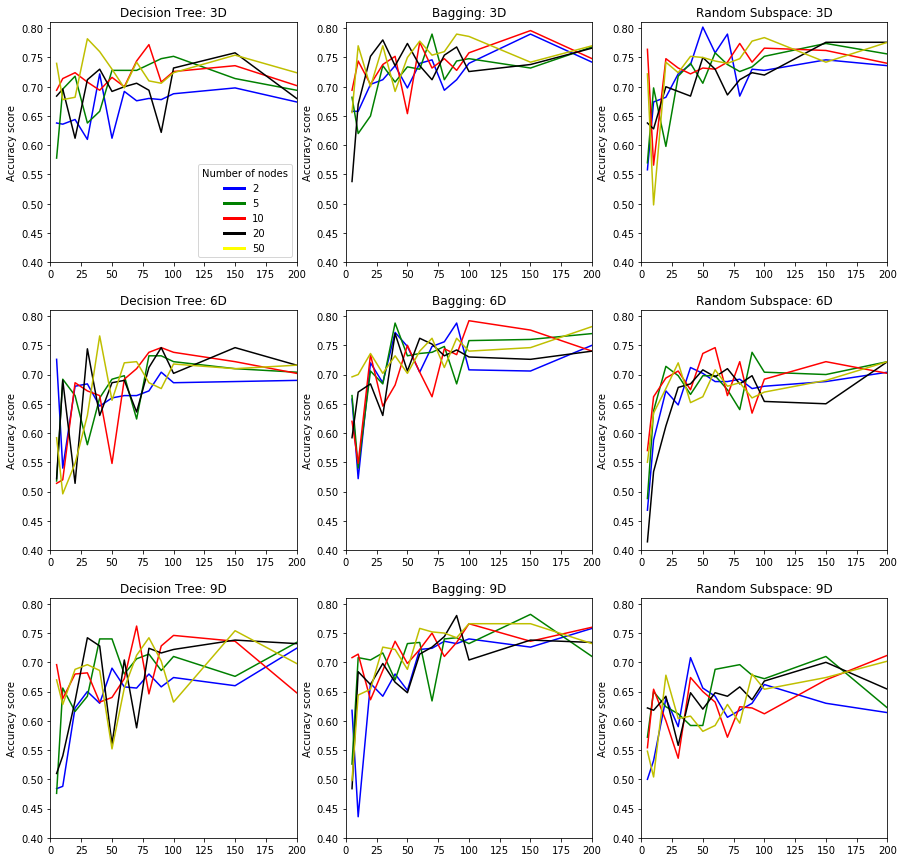

# Full results

# 17: Decision Tree results : Accuracy score over a range of ns

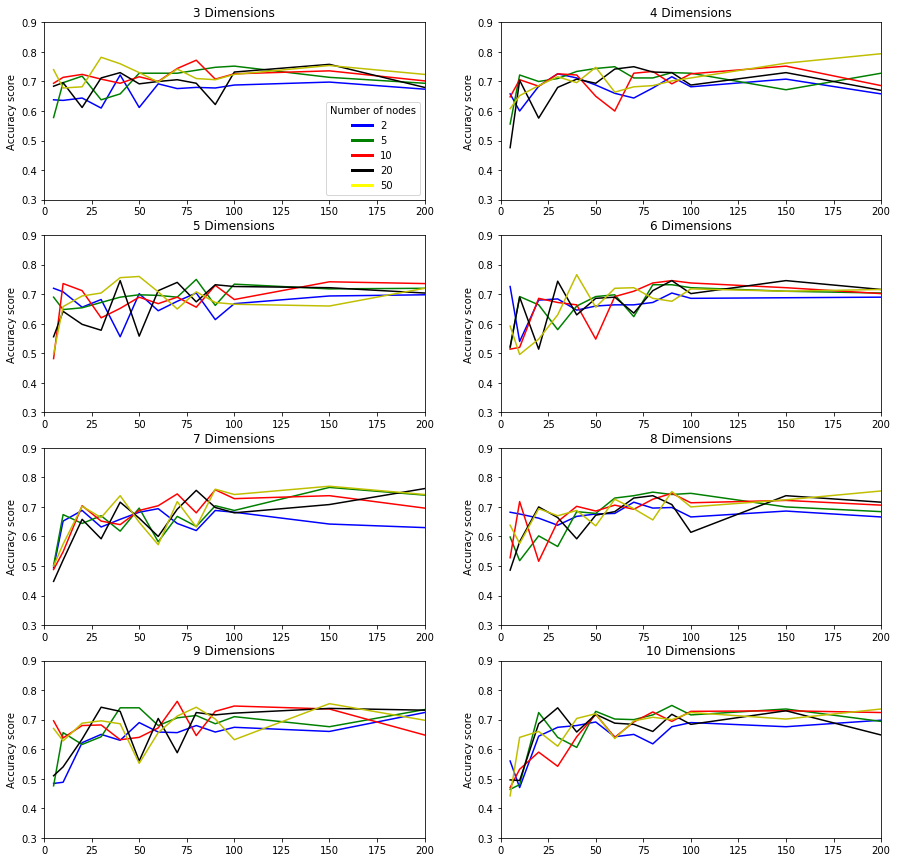

In [16]:
DT

# 17: Bagging Results: Accuracy score over a range of ns

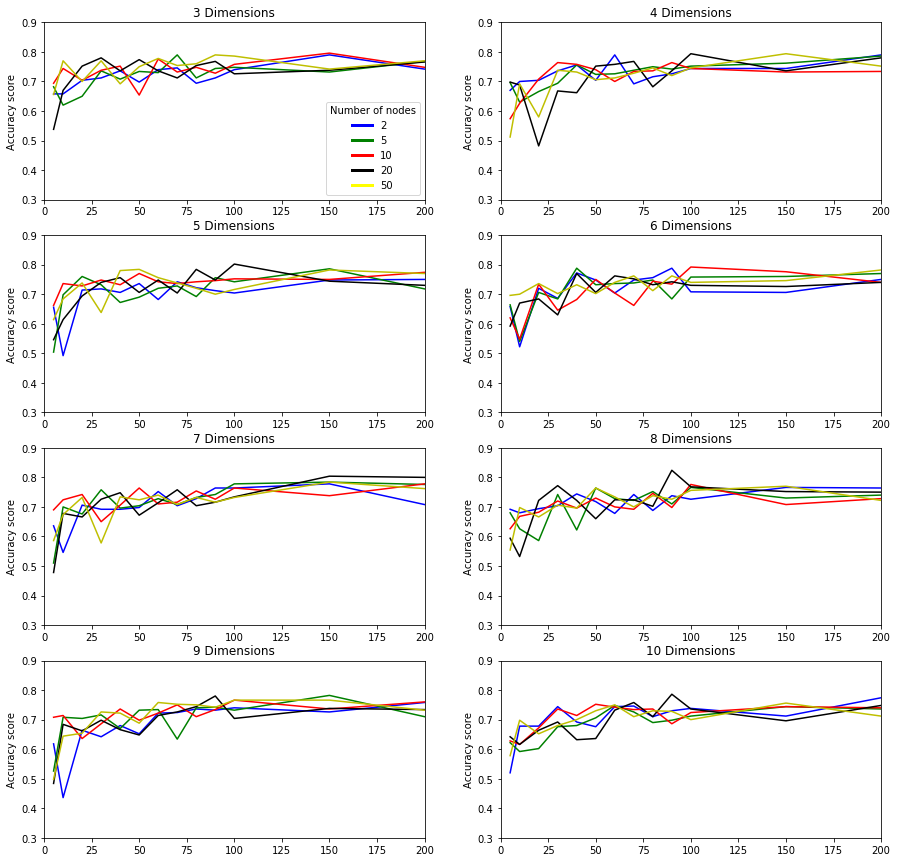

In [20]:
BAG

# 17: Random Subspace Results: Accuracy score over a range of ns

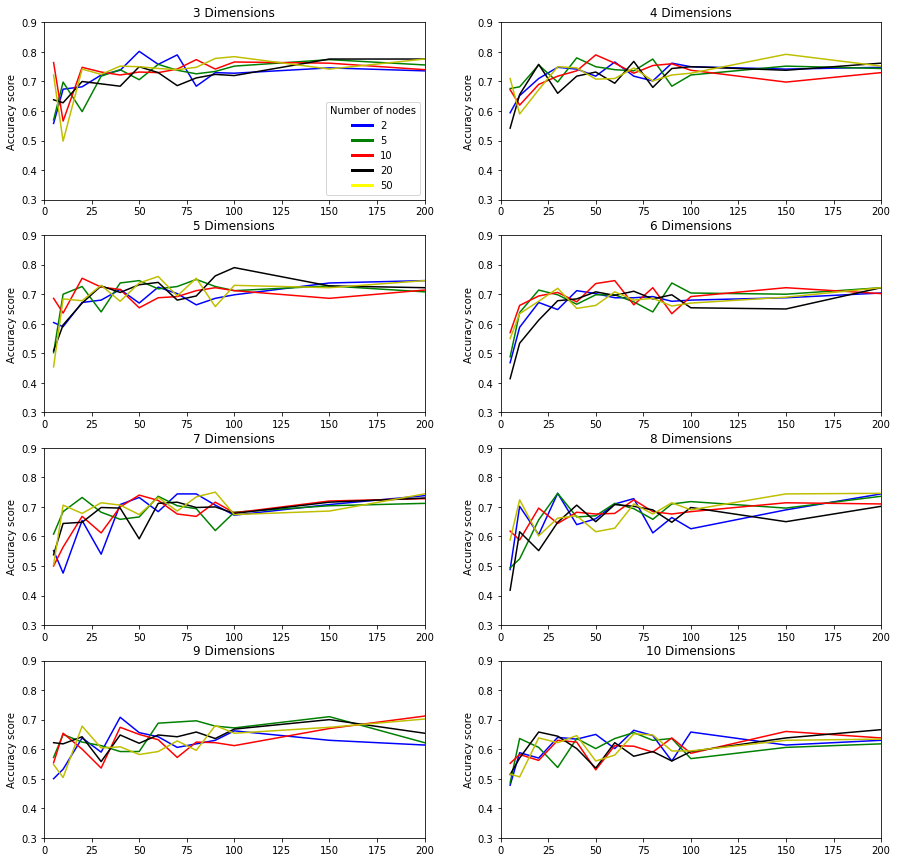

In [19]:
RS

# Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree.export import export_text
from sklearn.metrics import accuracy_score
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

# 17a: Decision Tree for a range of n, k, d

In [15]:
# Define parameters and ranges
k_range = [2,5,10,20,50]
n_range = [5,10,20,30,40,50,60,70,80,90,100,150,200]
d_range = [3,4,5,6,7,8,9,10]
test_n = 500

# Initialise results frames
res = pd.DataFrame()
bag_res = pd.DataFrame()
RS_res = pd.DataFrame()
row_idxs = []
col_idxs =[]

for n in n_range: 
    for d in d_range: 
        for k in k_range:
            
            # DECISION TREE CLASSIFIER
            # Generate sample
            train_Y, train_X = generate_sample(N= n, D = d)
            test_Y, test_X = generate_sample(N= test_n, D = d)
            # Train
            decision_tree = DecisionTreeClassifier(random_state=0,
                                                   max_depth=2,
                                                   splitter = "best",
                                                   criterion = "gini",
                                                   max_leaf_nodes = k).fit(train_X, train_Y)
            # Predict and score
            pred_Y = decision_tree.predict(test_X)
            ac1 = accuracy_score(pred_Y, test_Y)
             
            # BAGGING
            # Generate sample
            train_Y, train_X = generate_sample(N= n, D = d)
            test_Y, test_X = generate_sample(N= test_n, D = d)
            # Train           
            clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                                    n_estimators = 10,
                                    random_state=0,
                                    bootstrap= True).fit(train_X, train_Y)
            # Predict and score
            bag_pred_Y = clf.predict(test_X)
            ac2 = accuracy_score(bag_pred_Y, test_Y)
            
            # RANDOM SUBSPACE
            # Generate sample
            train_Y, train_X = generate_sample(N= n, D = d)
            test_Y, test_X = generate_sample(N= test_n, D = d)
            # Train           
            clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                                    n_estimators = 10,
                                    random_state=0,
                                    bootstrap= True,
                                    max_features= 3).fit(train_X, train_Y)
            # Predict and score
            RS_pred_Y = clf.predict(test_X)
            ac3 = accuracy_score(RS_pred_Y, test_Y)
            
            # RECORD RESULTS
            row_idx = "d" + str(d) + "_k" + str(k)
            if n == n_range[0]:                
                row_idxs.append(row_idx)
            col_idx = "n_" + str(n)
                       
            res.loc[row_idx, col_idx] = ac1
            bag_res.loc[row_idx, col_idx] = ac2
            RS_res.loc[row_idx, col_idx] = ac3
    
    col_idxs.append(col_idx)

            # r = export_text(decision_tree)
            # print(r)

In [ ]:
# Plot results: DT

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2', '5', '10', '20', '50'] # k

plt.show()

f, axs = plt.subplots(4,2, figsize=(15, 15))
plt.title("Test")

plt.subplot(4, 2, 1)
plt.plot(n_range, res.loc[row_idxs[0],:], 'b-' , n_range, res.loc[row_idxs[1],:], 'g-', n_range, res.loc[row_idxs[2],:], 'r-', n_range, res.loc[row_idxs[3],:], 'k-', n_range, res.loc[row_idxs[4],:], 'y-')
plt.title('3 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)
plt.legend(lines, labels, loc = "lower right", title = "Number of nodes")

plt.subplot(4, 2, 2)
plt.plot(n_range, res.loc[row_idxs[5],:], 'b-', n_range, res.loc[row_idxs[6],:], 'g-', n_range, res.loc[row_idxs[7],:], 'r-', n_range, res.loc[row_idxs[8],:], 'k-', n_range, res.loc[row_idxs[9],:], 'y-')
plt.title('4 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 3)
plt.plot(n_range, res.loc[row_idxs[10],:], 'b-', n_range, res.loc[row_idxs[11],:], 'g-', n_range, res.loc[row_idxs[12],:], 'r-', n_range, res.loc[row_idxs[13],:], 'k-', n_range, res.loc[row_idxs[14],:], 'y-')
plt.title('5 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 4)
plt.plot(n_range, res.loc[row_idxs[15],:], 'b-', n_range, res.loc[row_idxs[16],:], 'g-', n_range, res.loc[row_idxs[17],:], 'r-', n_range, res.loc[row_idxs[18],:], 'k-',  n_range, res.loc[row_idxs[19],:], 'y-', )
plt.title('6 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 5)
plt.plot(n_range, res.loc[row_idxs[20],:], 'b-', n_range, res.loc[row_idxs[21],:], 'g-', n_range, res.loc[row_idxs[22],:], 'r-' ,n_range, res.loc[row_idxs[23],:], 'k-', n_range, res.loc[row_idxs[24],:], 'y-')
plt.title('7 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 6)
plt.plot(n_range, res.loc[row_idxs[25],:], 'b-', n_range,  res.loc[row_idxs[26],:], 'g-', n_range,  res.loc[row_idxs[27],:], 'r-', n_range,  res.loc[row_idxs[28],:], 'k-', n_range, res.loc[row_idxs[29],:], 'y-')
plt.title('8 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 7)
plt.plot(n_range, res.loc[row_idxs[30],:], 'b-', n_range,  res.loc[row_idxs[31],:], 'g-', n_range,  res.loc[row_idxs[32],:], 'r-', n_range,  res.loc[row_idxs[33],:], 'k-', n_range, res.loc[row_idxs[34],:], 'y-')
plt.title('9 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 8)
plt.plot(n_range, res.loc[row_idxs[35],:], 'b-', n_range,  res.loc[row_idxs[36],:], 'g-', n_range,  res.loc[row_idxs[37],:], 'r-', n_range,  res.loc[row_idxs[38],:], 'k-', n_range, res.loc[row_idxs[39],:], 'y-')
plt.title('10 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)


plt.show()

In [ ]:
# Plot results: BAG

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2', '5', '10', '20', '50'] # k

plt.show()

f, axs = plt.subplots(4,2, figsize=(15, 15))

plt.subplot(4, 2, 1)
plt.plot(n_range, bag_res.loc[row_idxs[0],:], 'b-' , n_range, bag_res.loc[row_idxs[1],:], 'g-', n_range, bag_res.loc[row_idxs[2],:], 'r-', n_range, bag_res.loc[row_idxs[3],:], 'k-', n_range, bag_res.loc[row_idxs[4],:], 'y-')
plt.title('3 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)
plt.legend(lines, labels, loc = "lower right", title = "Number of nodes")

plt.subplot(4, 2, 2)
plt.plot(n_range, bag_res.loc[row_idxs[5],:], 'b-', n_range, bag_res.loc[row_idxs[6],:], 'g-', n_range, bag_res.loc[row_idxs[7],:], 'r-', n_range, bag_res.loc[row_idxs[8],:], 'k-', n_range,  bag_res.loc[row_idxs[9],:], 'y-')
plt.title('4 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 3)
plt.plot(n_range, bag_res.loc[row_idxs[10],:], 'b-', n_range, bag_res.loc[row_idxs[11],:], 'g-', n_range, bag_res.loc[row_idxs[12],:], 'r-', n_range, bag_res.loc[row_idxs[13],:], 'k-', n_range, bag_res.loc[row_idxs[14],:], 'y-')
plt.title('5 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 4)
plt.plot(n_range, bag_res.loc[row_idxs[15],:], 'b-', n_range, bag_res.loc[row_idxs[16],:], 'g-', n_range, bag_res.loc[row_idxs[17],:], 'r-', n_range, bag_res.loc[row_idxs[18],:], 'k-',  n_range, bag_res.loc[row_idxs[19],:], 'y-', )
plt.title('6 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 5)
plt.plot(n_range, bag_res.loc[row_idxs[20],:], 'b-', n_range, bag_res.loc[row_idxs[21],:], 'g-', n_range, bag_res.loc[row_idxs[22],:], 'r-' ,n_range, bag_res.loc[row_idxs[23],:], 'k-', n_range, bag_res.loc[row_idxs[24],:], 'y-')
plt.title('7 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 6)
plt.plot(n_range, bag_res.loc[row_idxs[25],:], 'b-', n_range,  bag_res.loc[row_idxs[26],:], 'g-', n_range,  bag_res.loc[row_idxs[27],:], 'r-', n_range,  bag_res.loc[row_idxs[28],:], 'k-', n_range, bag_res.loc[row_idxs[29],:], 'y-')
plt.title('8 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 7)
plt.plot(n_range, bag_res.loc[row_idxs[30],:], 'b-', n_range,  bag_res.loc[row_idxs[31],:], 'g-', n_range,  bag_res.loc[row_idxs[32],:], 'r-', n_range,  bag_res.loc[row_idxs[33],:], 'k-', n_range, bag_res.loc[row_idxs[34],:], 'y-')
plt.title('9 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 8)
plt.plot(n_range, bag_res.loc[row_idxs[35],:], 'b-', n_range,  bag_res.loc[row_idxs[36],:], 'g-', n_range,  bag_res.loc[row_idxs[37],:], 'r-', n_range,  bag_res.loc[row_idxs[38],:], 'k-', n_range, bag_res.loc[row_idxs[39],:], 'y-')
plt.title('10 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)


plt.show()

In [28]:
# Plot results: RS

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2', '5', '10', '20', '50'] # k

plt.show()

f, axs = plt.subplots(4,2, figsize=(15, 15))

plt.subplot(4, 2, 1)
plt.plot(n_range, RS_res.loc[row_idxs[0],:], 'b-' , n_range, RS_res.loc[row_idxs[1],:], 'g-', n_range, RS_res.loc[row_idxs[2],:], 'r-', n_range, RS_res.loc[row_idxs[3],:], 'k-', n_range, RS_res.loc[row_idxs[4],:], 'y-')
plt.title('3 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)
plt.legend(lines, labels, loc = "lower right", title = "Number of nodes")

plt.subplot(4, 2, 2)
plt.plot(n_range, RS_res.loc[row_idxs[5],:], 'b-', n_range, RS_res.loc[row_idxs[6],:], 'g-', n_range, RS_res.loc[row_idxs[7],:], 'r-', n_range, RS_res.loc[row_idxs[8],:], 'k-', n_range,  RS_res.loc[row_idxs[9],:], 'y-')
plt.title('4 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 3)
plt.plot(n_range, RS_res.loc[row_idxs[10],:], 'b-', n_range, RS_res.loc[row_idxs[11],:], 'g-', n_range, RS_res.loc[row_idxs[12],:], 'r-', n_range, RS_res.loc[row_idxs[13],:], 'k-', n_range, RS_res.loc[row_idxs[14],:], 'y-')
plt.title('5 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 4)
plt.plot(n_range, RS_res.loc[row_idxs[15],:], 'b-', n_range, RS_res.loc[row_idxs[16],:], 'g-', n_range, RS_res.loc[row_idxs[17],:], 'r-', n_range, RS_res.loc[row_idxs[18],:], 'k-',  n_range, RS_res.loc[row_idxs[19],:], 'y-', )
plt.title('6 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 5)
plt.plot(n_range, RS_res.loc[row_idxs[20],:], 'b-', n_range, RS_res.loc[row_idxs[21],:], 'g-', n_range, RS_res.loc[row_idxs[22],:], 'r-' ,n_range, RS_res.loc[row_idxs[23],:], 'k-', n_range, RS_res.loc[row_idxs[24],:], 'y-')
plt.title('7 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 6)
plt.plot(n_range, RS_res.loc[row_idxs[25],:], 'b-', n_range,  RS_res.loc[row_idxs[26],:], 'g-', n_range,  RS_res.loc[row_idxs[27],:], 'r-', n_range,  RS_res.loc[row_idxs[28],:], 'k-', n_range, RS_res.loc[row_idxs[29],:], 'y-')
plt.title('8 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 7)
plt.plot(n_range, RS_res.loc[row_idxs[30],:], 'b-', n_range,  RS_res.loc[row_idxs[31],:], 'g-', n_range,  RS_res.loc[row_idxs[32],:], 'r-', n_range,  RS_res.loc[row_idxs[33],:], 'k-', n_range, RS_res.loc[row_idxs[34],:], 'y-')
plt.title('9 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)

plt.subplot(4, 2, 8)
plt.plot(n_range, RS_res.loc[row_idxs[35],:], 'b-', n_range,  RS_res.loc[row_idxs[36],:], 'g-', n_range,  RS_res.loc[row_idxs[37],:], 'r-', n_range,  RS_res.loc[row_idxs[38],:], 'k-', n_range, RS_res.loc[row_idxs[39],:], 'y-')
plt.title('10 Dimensions')
plt.ylabel('Accuracy score')
plt.ylim(0.3,0.9)
plt.xlim(0,200)


plt.show()

In [ ]:
# Plot comparison

colors = ['blue', 'green', 'red', 'black', 'yellow']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2', '5', '10', '20', '50'] # k

plt.show()

f, axs = plt.subplots(3,3, figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.plot(n_range, res.loc[row_idxs[0],:], 'b-' , n_range, res.loc[row_idxs[1],:], 'g-', n_range, res.loc[row_idxs[2],:], 'r-', n_range, res.loc[row_idxs[3],:], 'k-', n_range, res.loc[row_idxs[4],:], 'y-')
plt.title('Decision Tree: 3D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)
plt.legend(lines, labels, loc = "lower right", title = "Number of nodes")

plt.subplot(3, 3, 2)
plt.plot(n_range, bag_res.loc[row_idxs[0],:], 'b-', n_range, bag_res.loc[row_idxs[1],:], 'g-', n_range, bag_res.loc[row_idxs[2],:], 'r-', n_range, bag_res.loc[row_idxs[3],:], 'k-', n_range,  bag_res.loc[row_idxs[4],:], 'y-')
plt.title('Bagging: 3D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 3)
plt.plot(n_range, RS_res.loc[row_idxs[0],:], 'b-', n_range, RS_res.loc[row_idxs[1],:], 'g-', n_range, RS_res.loc[row_idxs[2],:], 'r-', n_range, RS_res.loc[row_idxs[3],:], 'k-', n_range, RS_res.loc[row_idxs[4],:], 'y-')
plt.title('Random Subspace: 3D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 4)
plt.plot(n_range, res.loc[row_idxs[15],:], 'b-', n_range, res.loc[row_idxs[16],:], 'g-', n_range, res.loc[row_idxs[17],:], 'r-', n_range, res.loc[row_idxs[18],:], 'k-',  n_range, res.loc[row_idxs[19],:], 'y-', )
plt.title('Decision Tree: 6D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 5)
plt.plot(n_range, bag_res.loc[row_idxs[15],:], 'b-', n_range, bag_res.loc[row_idxs[16],:], 'g-', n_range, bag_res.loc[row_idxs[17],:], 'r-' ,n_range, bag_res.loc[row_idxs[18],:], 'k-', n_range, bag_res.loc[row_idxs[19],:], 'y-')
plt.title('Bagging: 6D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 6)
plt.plot(n_range, RS_res.loc[row_idxs[15],:], 'b-', n_range,  RS_res.loc[row_idxs[16],:], 'g-', n_range,  RS_res.loc[row_idxs[17],:], 'r-', n_range,  RS_res.loc[row_idxs[18],:], 'k-', n_range, RS_res.loc[row_idxs[19],:], 'y-')
plt.title('Random Subspace: 6D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 7)
plt.plot(n_range, res.loc[row_idxs[30],:], 'b-', n_range,  res.loc[row_idxs[31],:], 'g-', n_range,  res.loc[row_idxs[32],:], 'r-', n_range,  res.loc[row_idxs[33],:], 'k-', n_range, res.loc[row_idxs[34],:], 'y-')
plt.title('Decision Tree: 9D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 8)
plt.plot(n_range, bag_res.loc[row_idxs[30],:], 'b-', n_range,  bag_res.loc[row_idxs[31],:], 'g-', n_range,  bag_res.loc[row_idxs[32],:], 'r-', n_range,  bag_res.loc[row_idxs[33],:], 'k-', n_range, bag_res.loc[row_idxs[34],:], 'y-')
plt.title('Bagging: 9D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.subplot(3, 3, 9)
plt.plot(n_range, RS_res.loc[row_idxs[30],:], 'b-', n_range,  RS_res.loc[row_idxs[31],:], 'g-', n_range,  RS_res.loc[row_idxs[32],:], 'r-', n_range,  RS_res.loc[row_idxs[33],:], 'k-', n_range, RS_res.loc[row_idxs[34],:], 'y-')
plt.title('Random Subspace: 9D')
plt.ylabel('Accuracy score')
plt.ylim(0.4,0.81)
plt.xlim(0,200)

plt.show()

# Functions

In [2]:
def generate_sample(N, D, p=0.5):

    # Initialise lists
    Ys = []
    Xs = []

    # Calculate conditional means and covariances
    Y0_mean = [0] * D
    if D > 3:
        Y1_mean = [item for sublist in ([1] * 3, [0] * (D-3)) for item in sublist]
    else : Y1_mean = [1] * D
    ones= np.array([1] * (D**2)).reshape(D,D)
    covar = np.diag(np.diag(ones))

    # Create sample
    for n in np.arange(0, N): 

        Y = np.random.binomial(1, p)
        Ys.append(Y)

        if Y == 0:
            X = np.random.multivariate_normal(Y0_mean, covar)

        elif Y == 1:
            X = np.random.multivariate_normal(Y1_mean, covar)

        Xs.append(X)
    
    result = list([Ys, Xs])
    
    return(result)